### PROJECT TEAM ID : " PTID-CDS-JUL-23-1578 "


### PROJECT ID : PRCP-1025-FlightPricePrediction

# Business Case: Based on the given features we need to predict the flight ticket price.

# Problem Statement
Flight ticket prices can be something hard to guess, today we might see a price, check
out the price of the same flight tomorrow, it will be a different story. We might have often
heard travelers saying that flight ticket prices are so unpredictable. That’s why we will
try to use machine learning to solve this problem. This can help airlines by predicting
what prices they can maintain.

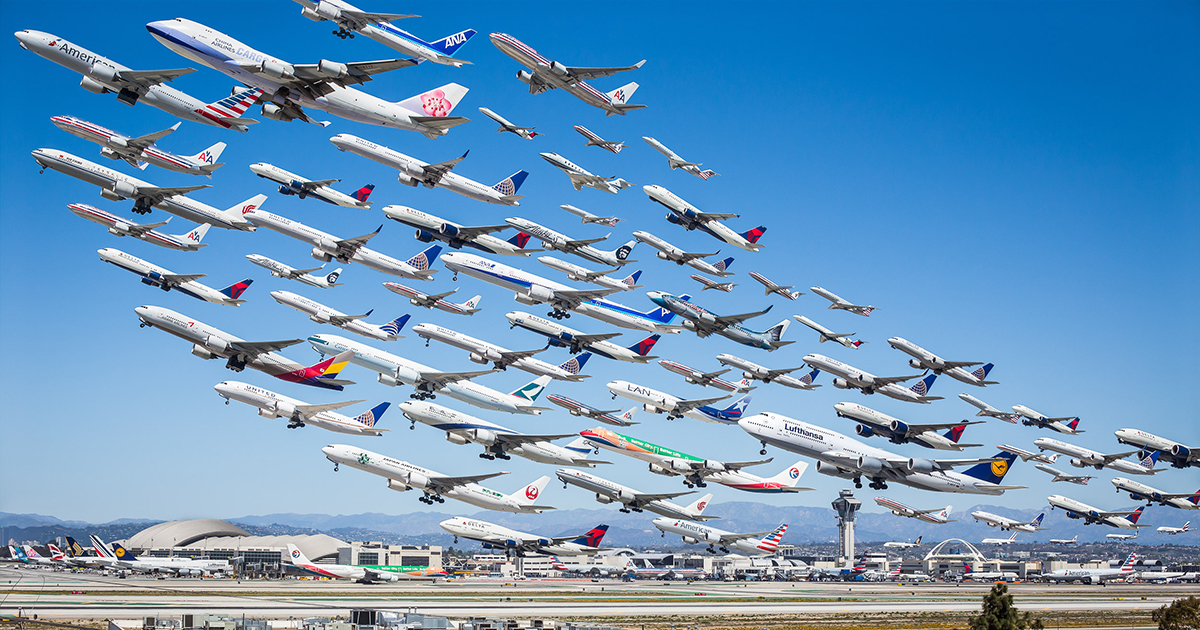

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading the data
data = pd.read_excel('Flight_Fare.xlsx')
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


## Domain Analysis:

#### 1) Airlines:
An organization that provides regular public air transportation on one or more routes. The service allows travelers to search multiple carriers' flight schedules. This column includes various types of airlines, such as Indigo, Jet Airways, and Air India, among others.

#### 2) Date_of_Journey:
This column is going to notify us of the date the passenger's travel will begin.

#### 3) Source:
This column contains the name of the location from which the passenger's journey will begin.

#### 4) Destination:
This column includes the name of the location to which the passengers wish to travel.

#### 5) Route:
In this column, we can learn about the path that travelers have chosen to take from their origin to their destination.

#### 6) Dep_Time:
When the plane departs from the airport.

#### 7) Arrival_Time:
The arrival time is the time when the traveler will arrive at his or her destination.

#### 8) Duration:
The duration of a flight is the amount of time it takes to go from the starting point to the destination.

#### 9) Total_Stops:
This feature will tell us how many times flights will stop between the origin and destination during the entire voyage.

#### 10) Additional_Info:
We shall learn about eating, the types of food, and other facilities in this column.

#### 11) Price:
The cost of the flight for the entire voyage, including all charges before boarding.

## Basic Checks

In [4]:
#Getting the first five rows
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
#Getting the last five rows
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [6]:
data.shape

(10683, 11)

# Task 1:-Prepare a complete data analysis report on the given data.

In [7]:
#Used to view some basic statistical details like percentile,mean,std etc.
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [8]:
#It will give you info about categorical data/columns
data.describe(include = ['O'])

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [10]:
#To check data type and null values for all columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [11]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

## Exploratory Data Analysis

## Univariate Analysis

**Categorical data :**
- Airline, Source, Destination, Route, Additional_Info.

**Numerical data :**
- Date_of_Journey, Dep_Time, Arrival_Time, Duration, Total_Stops.

## Categorical data:

### Bar chart showing top 10 most preferred Airlines

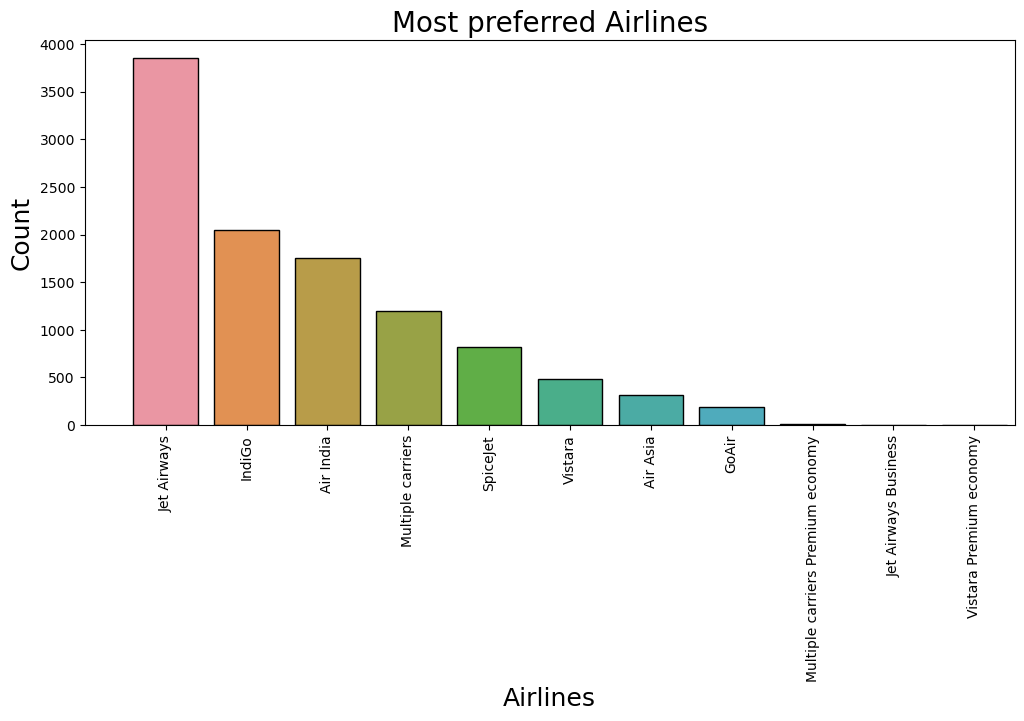

In [12]:
plt.figure(figsize = (12, 5))
sns.countplot(x = 'Airline', data = data, order = data['Airline'].value_counts().index, ec = 'black')
plt.title('Most preferred Airlines', fontsize = 20, color = 'black')
plt.xlabel('Airlines', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.xticks(rotation = 90)
plt.xlim(-1, 10.5)
plt.show()

## Insights

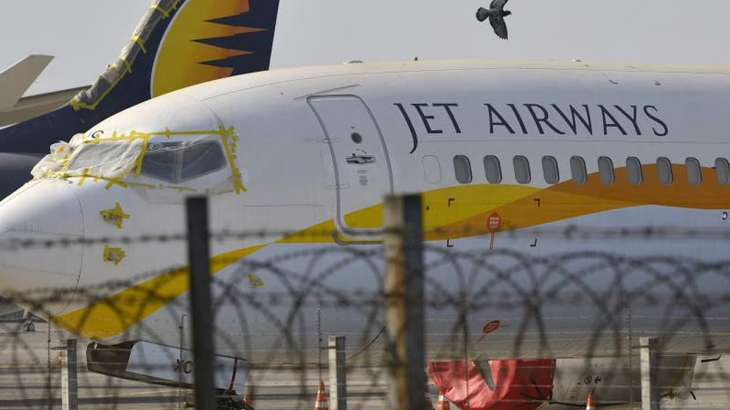
- Jet Airways is the most preferred airline.
- Among all flight tickets sold, Jet Airways has the largest percentage, followed by Indigo.
- Jet Airways Business and Vistara Premium Economy are the least preferred airlines.
- The highest recommended airline has a count of 3850 (approx).

### Bar chart showing the most preferred source

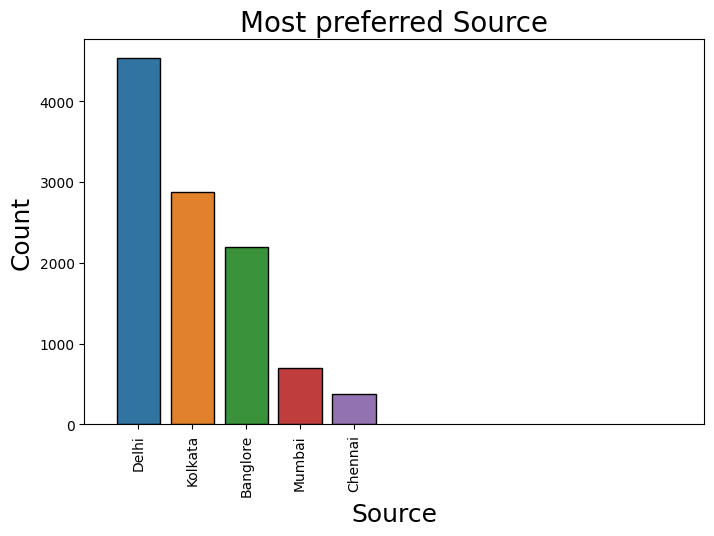

In [ ]:
plt.figure(figsize = (8, 5))
sns.countplot(x = 'Source', data = data, order = data['Source'].value_counts().index, ec = 'black')
plt.title('Most preferred Source',fontsize = 20, color = 'black')
plt.xlabel('Source', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.xticks(rotation = 90)
plt.xlim(-1, 10.5)
plt.show()

## Insights

- This countplot indicates the most desired source (i.e., the name of the location from which the majority of the passenger's journey will begin).

- The most popular source is Delhi, which has a population of around 4000 people. Chennai is the last on the list.

### Bar chart showing the most preferred Destination

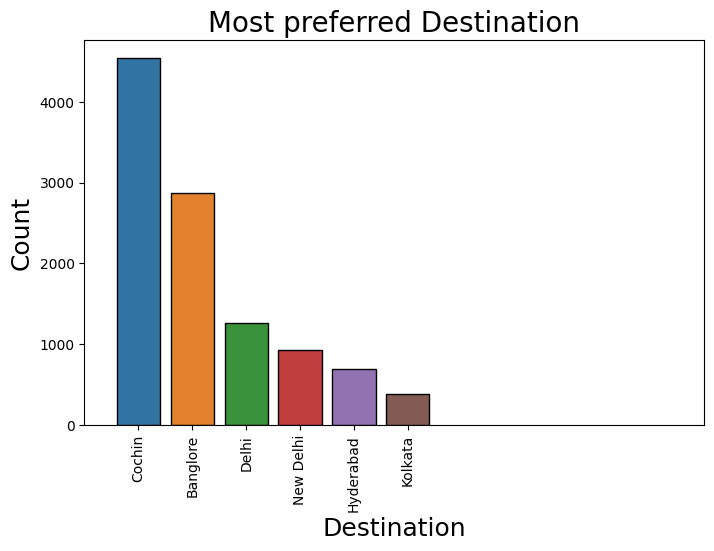

In [ ]:
plt.figure(figsize = (8,5))
sns.countplot(x = 'Destination', data = data, order = data['Destination'].value_counts().index, ec = 'black')
plt.title('Most preferred Destination', fontsize = 20, color = 'black')
plt.xlabel('Destination', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.xticks(rotation = 90)
plt.xlim(-1, 10.5)
plt.show()

## Insights

- This countplot indicates the most chosen destination (i.e., the name of the location to which the majority of the passengers desired to travel).
- Once again, Cochin is the most popular destination, with over 4000 visitors. Kolkata is the last on the list.


### Bar chart showing top 30 most preferred Route

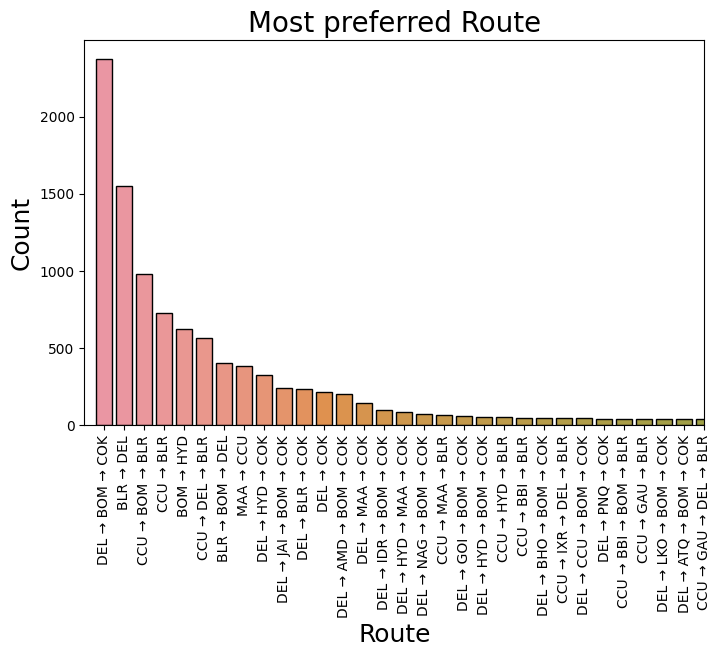

In [ ]:
plt.figure(figsize = (8, 5))
sns.countplot(x = 'Route', data = data, order = data['Route'].value_counts().index, ec = 'black')
plt.title('Most preferred Route', fontsize = 20, color = 'black')
plt.xlabel('Route', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.xticks(rotation = 90)
plt.xlim(-1, 30)
plt.show()

## Insights

- The most preferred Route is DEL→BOM→COK.
- Followed by BLR→DEL

### Bar chart showing sbout the Additional_Info

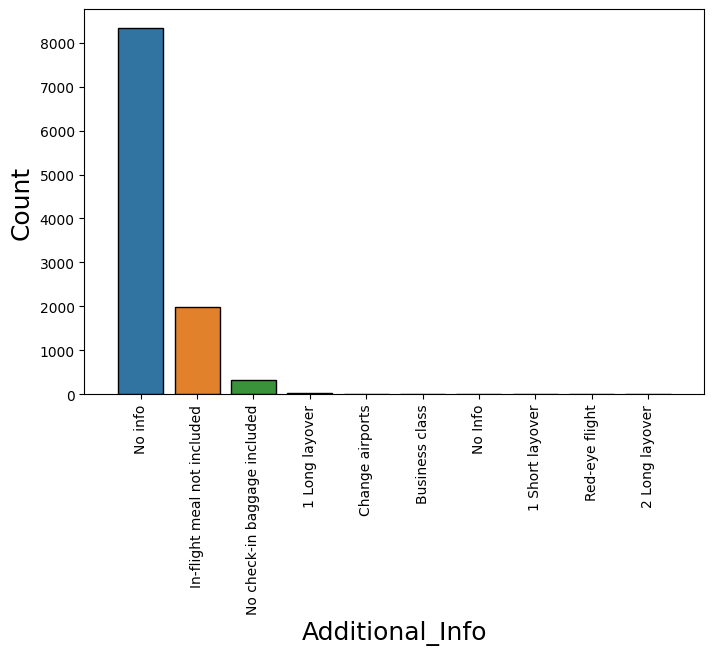

In [ ]:
plt.figure(figsize = (8, 5))
sns.countplot(x = 'Additional_Info', data = data, order = data['Additional_Info'].value_counts().index, ec = 'black')
plt.xlabel('Additional_Info', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.xticks(rotation = 90)
plt.xlim(-1, 10)
plt.show()

## Insights

- In Additional_Info the highest count is 'No info'.
- And it is followed by In-flight meal not included.

## Numerical Data:

In [ ]:
#Creating a new dataframe with numerical variables only
data1 = data[['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops']]
data1

,Date_of_Journey,Dep_Time,Arrival_Time,Duration,Total_Stops
0,24/03/2019,22:20,01:10 22 Mar,2h 50m,non-stop
1,1/05/2019,05:50,13:15,7h 25m,2 stops
2,9/06/2019,09:25,04:25 10 Jun,19h,2 stops
3,12/05/2019,18:05,23:30,5h 25m,1 stop
4,01/03/2019,16:50,21:35,4h 45m,1 stop
...,...,...,...,...,...
10678,9/04/2019,19:55,22:25,2h 30m,non-stop
10679,27/04/2019,20:45,23:20,2h 35m,non-stop
10680,27/04/2019,08:20,11:20,3h,non-stop
10681,01/03/2019,11:30,14:10,2h 40m,non-stop


### Histplot showing about the Numerical data

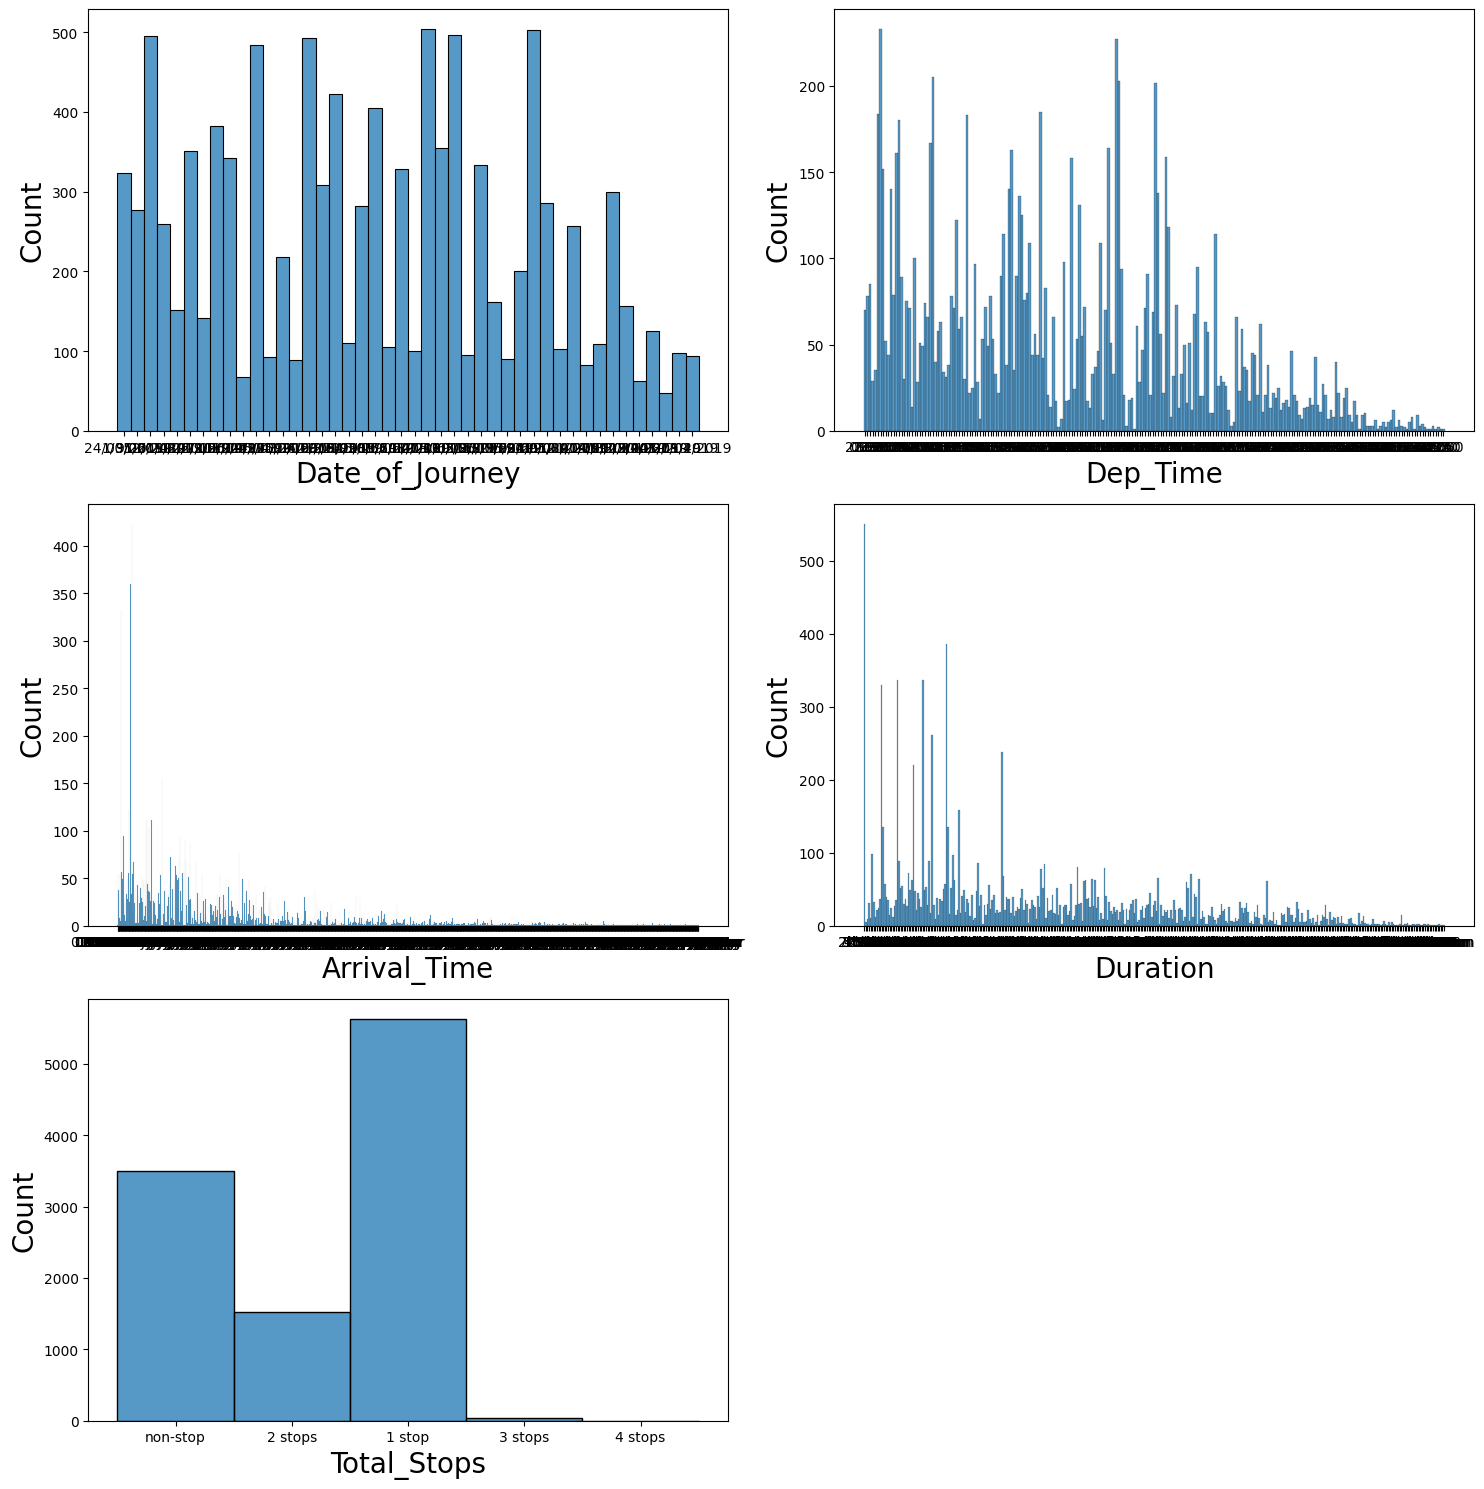

In [ ]:
plt.figure(figsize = (15, 15))
plotnumber = 1

for i in data1:
    plt.subplot(3, 2, plotnumber)
    sns.histplot(data1[i])
    plt.xlabel(i, fontsize = 20)
    plt.ylabel('Count', fontsize = 20)
    plotnumber = plotnumber + 1
plt.tight_layout()

## Insights

- As we can see from the graphs, the dataset is substantial and has 10,683 rows.
- Due to the fact that each passenger travels at a different time based on their preferences, departure Time, Arrival Time, and Duration all include numerous unique values.- As a result, the x labeling is overlapping, which prevents us from deriving the proper conclusions from this graph.
- While the date of travel and the number of stops have less unique value and make plotting simpler, we have learned from those.


### Histplot showing about the Most preferred Date of Journey

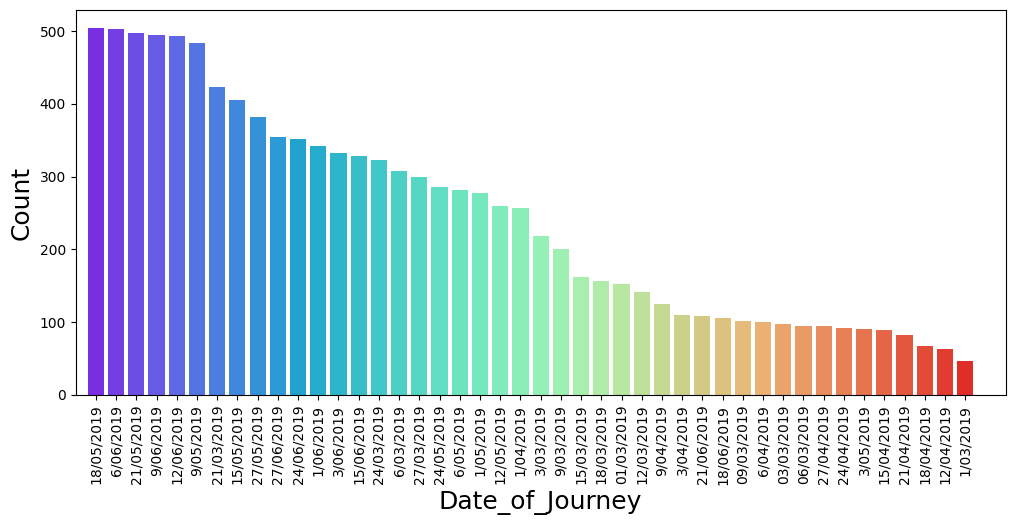

In [ ]:


# Assuming you have loaded your data into a DataFrame named 'data'

# Create a figure with a suitable size
plt.figure(figsize=(12, 5))

# Define a rainbow color palette
rainbow_palette = sns.color_palette("rainbow", len(data['Date_of_Journey'].value_counts()))

# Create a countplot to visualize the frequency of flights on different dates
sns.countplot(x='Date_of_Journey', data=data, order=data['Date_of_Journey'].value_counts().index, palette=rainbow_palette)

# Set x-axis and y-axis labels
plt.xlabel('Date_of_Journey', fontsize=18)
plt.ylabel('Count', fontsize=18)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.gca().invert_xaxis()  # Invert the x-axis to display dates in descending order

# Limit the number of displayed dates on the x-axis if needed
plt.xlim(-1, 45)

# Show the plot
plt.show()



## Insights

- The count of passengers travelling  at the date of 18/05/2019 and 6/06/2019 are approximately same are the highest.
- Followed by 21/05/2019, 9/06/2019 and 12/06/2019 approximately have the same count of passengers travelled in that date.
- The least count of passengers travelled is on 1/03/2019.

### Histplot showing about the count of the Total Stops

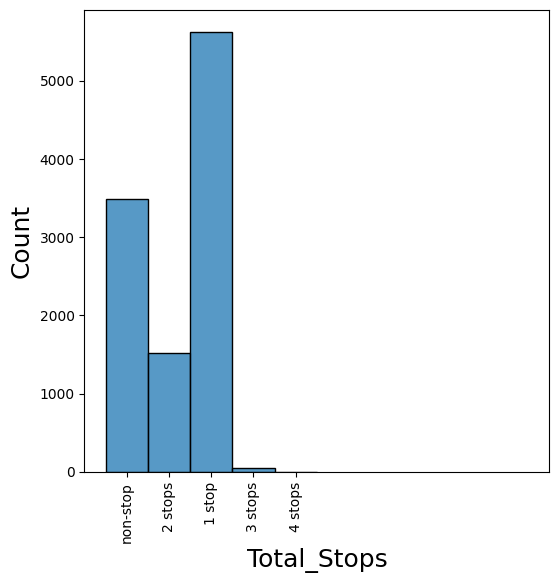

In [ ]:
plt.figure(figsize = (6, 6))
sns.histplot(x = 'Total_Stops', data = data, ec = 'black')
plt.xlabel('Total_Stops', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.xticks(rotation = 90)
plt.xlim(-1, 10)
plt.show()

## Insights

- One stop has the greatest count, followed by non-stop.
- Because non-stop travel saves time, passengers prefer it.
- But one stop is the most preferred.
- Four stops make up the least number of total stops.


## Bivariate Analysis

### Airline Vs Flight Ticket Price

In [ ]:
airlines = data.groupby('Airline').Price.max()
airlines_df = airlines.to_frame().sort_values('Price', ascending = False)
airlines_df

,Price
Airline,
Jet Airways Business,79512
Jet Airways,54826
Multiple carriers,36983
Air India,31945
SpiceJet,23267
GoAir,22794
IndiGo,22153
Vistara,21730
Multiple carriers Premium economy,14629


### Bar plot showing Airline company Vs Flight Ticket Price

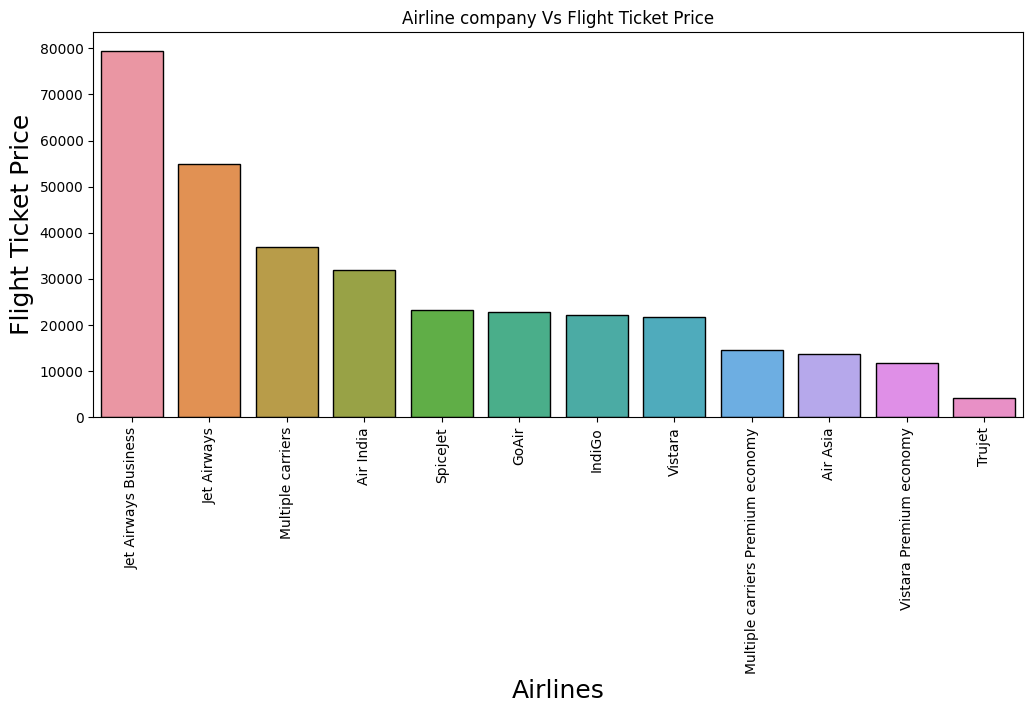

In [ ]:
plt.subplots(figsize = (12, 5))
sns.barplot(x = airlines_df.index,y = airlines_df['Price'], ec = 'black')
plt.title('Airline company Vs Flight Ticket Price')
plt.xlabel('Airlines', fontsize = 18)
plt.ylabel('Flight Ticket Price', fontsize = 18)
plt.xticks(rotation = 90)
plt.show()

## Insights

- Based on the graph above, we can see that Jet Airways Business is the most expensive.

- It is the least popular airline, as we have already seen.

- Jet Airways follows it in order. Trujet is the least expensive airline, with a ticket costing around $1759.

- The most expensive ticket costs 79,512.



In [ ]:
data.Price.min()

1759

In [ ]:
data.Price.max()

79512

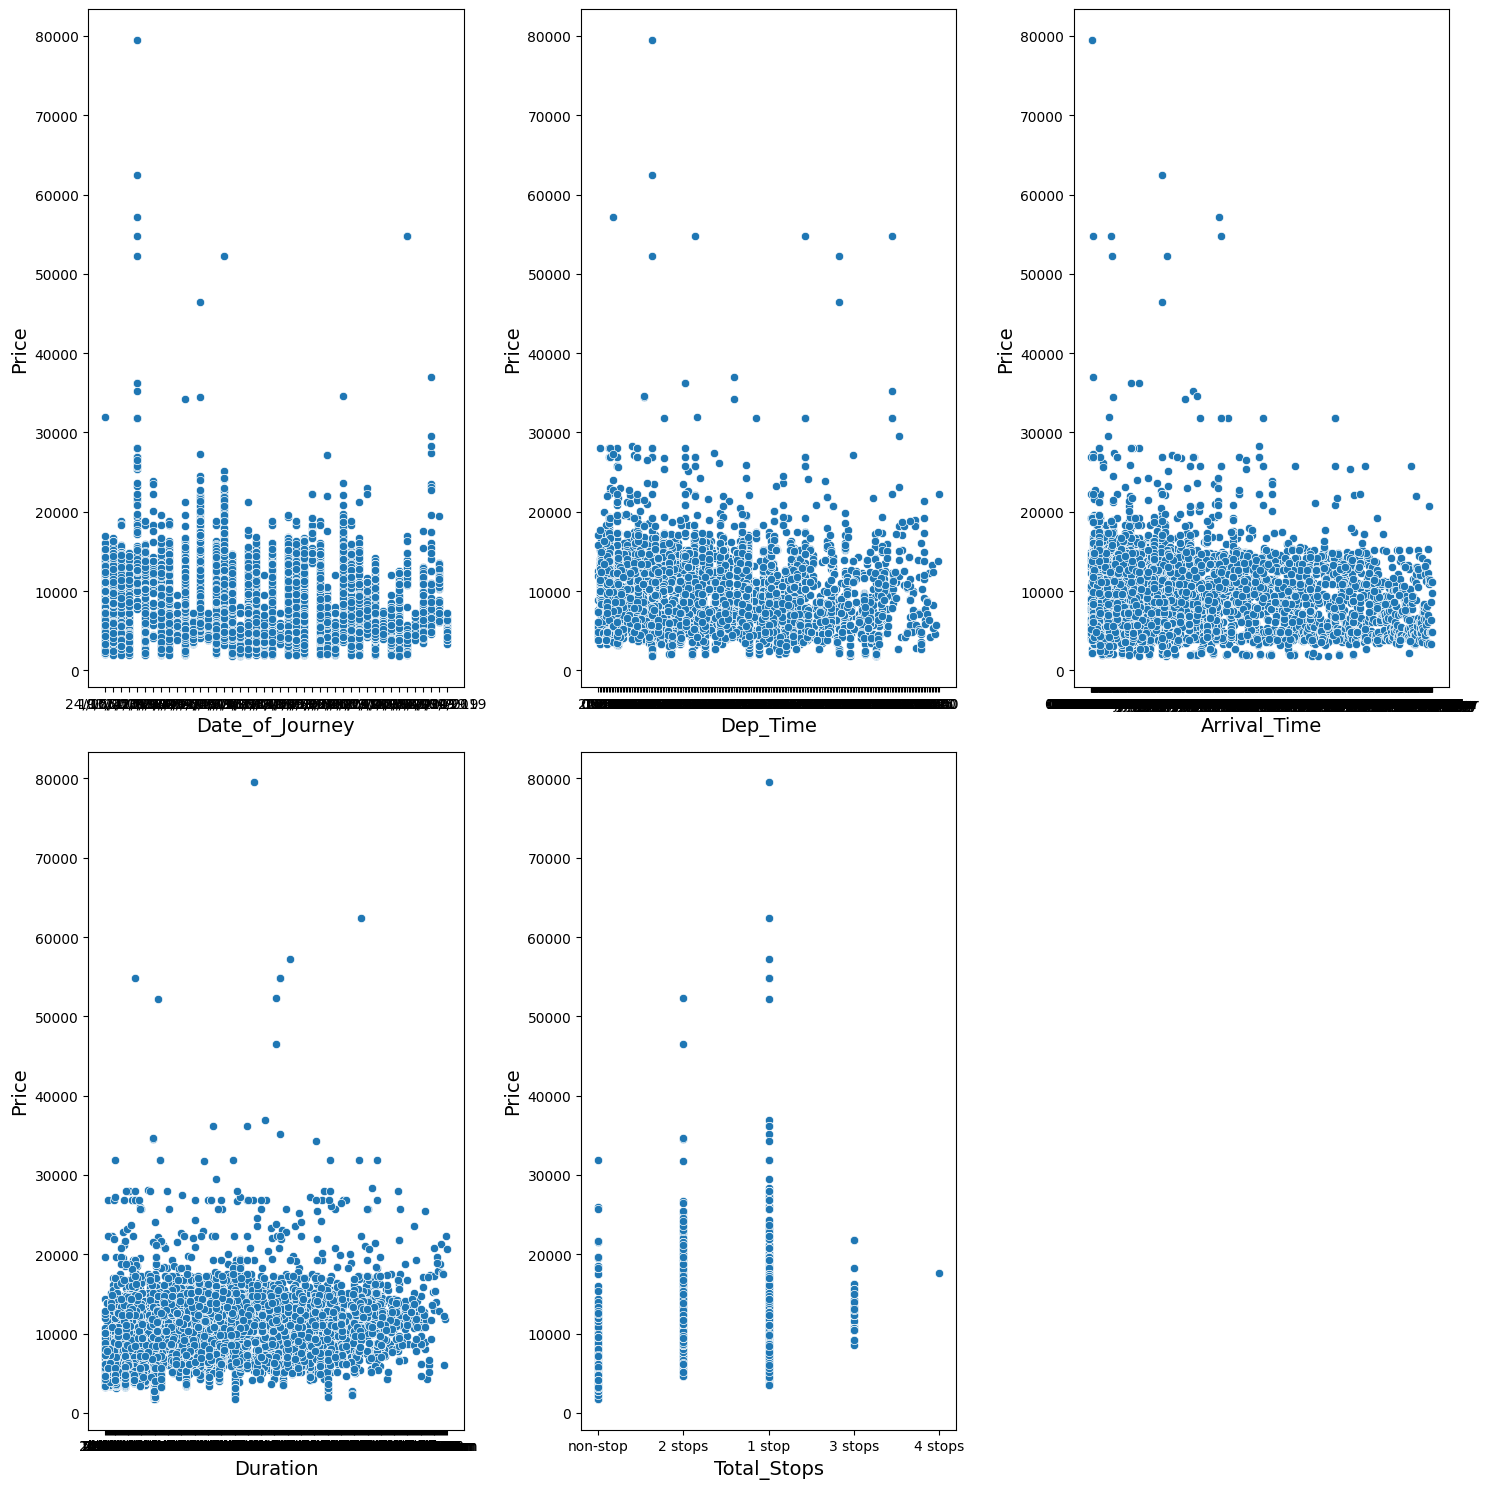

In [ ]:
plt.figure(figsize = (15, 15))
plotnumber = 1

for i in data1:
    plt.subplot(2, 3, plotnumber)
    sns.scatterplot(x = data[i], y = data.Price)
    plt.xlabel(i, fontsize = 14)
    plt.ylabel('Price', fontsize = 14)
    plotnumber = plotnumber + 1
plt.tight_layout()

## Insights

- No specific link was discovered.
- In terms of total stops, we can see that 1 Stop has the most expensive ticket.



### Price on Weekdays Vs Price on Weekends

In [ ]:
days_df = data[['Airline', 'Date_of_Journey', 'Price']]
days_df.head()

,Airline,Date_of_Journey,Price
0,IndiGo,24/03/2019,3897
1,Air India,1/05/2019,7662
2,Jet Airways,9/06/2019,13882
3,IndiGo,12/05/2019,6218
4,IndiGo,01/03/2019,13302


In [ ]:
days_df['Date_of_Journey'] = pd.to_datetime(days_df['Date_of_Journey'], format = '%d/%m/%Y')
days_df['Weekday'] = days_df['Date_of_Journey'].dt.day_name()
days_df['Weekend'] = days_df['Weekday'].apply(lambda day:1 if day == 'Sunday' else 0)
days_df.head()

,Airline,Date_of_Journey,Price,Weekday,Weekend
0,IndiGo,2019-03-24,3897,Sunday,1
1,Air India,2019-05-01,7662,Wednesday,0
2,Jet Airways,2019-06-09,13882,Sunday,1
3,IndiGo,2019-05-12,6218,Sunday,1
4,IndiGo,2019-03-01,13302,Friday,0


### Barplot showing the Price on Weekdays Vs Weekends

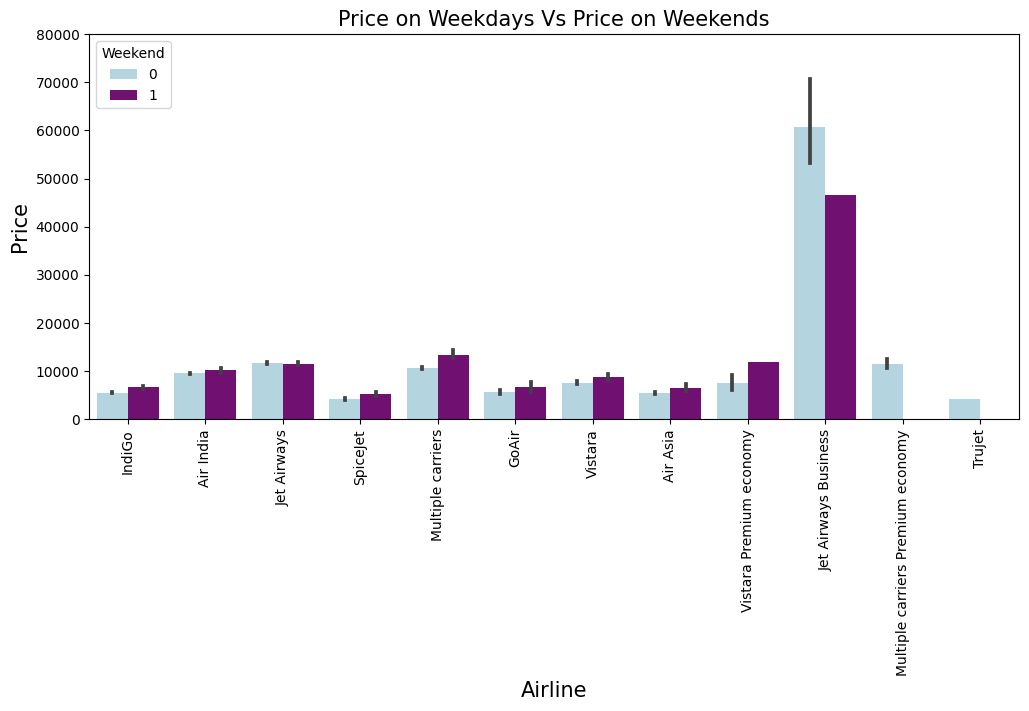

In [ ]:


# Create a subplot with a suitable size
plt.subplots(figsize=(12, 5))

# Map the 'Weekend' column to colors (1 to 'purple' and 0 to 'lightblue')
color_palette = {1: 'purple', 0: 'lightblue'}

# Create a barplot using Seaborn, mapping 'Weekend' to colors
sns.barplot(x='Airline', data=days_df, y='Price', hue='Weekend', palette=color_palette)

# Set the title, x-axis label, and y-axis label
plt.title('Price on Weekdays Vs Price on Weekends', fontsize=15, color='black')
plt.xlabel('Airline', fontsize=15)
plt.ylabel('Price', fontsize=15)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set the y-axis limit
plt.ylim(0, 80000)

# Show the plot
plt.show()


## Insights

Based on what we've seen, only Jet Airways Business, Multiple Carriers Premium Economy, and Trujet Airlines have higher ticket prices throughout the week than other airlines do on the weekend. We can infer that weekends have higher ticket prices.


# Data Preprocessing

## Feature Engineering

In [ ]:
#Extracting date, month and year from Date_of_Journey feature and store them in new columns.
data['Journey_date'] = data['Date_of_Journey'].str.split('/').str[0].astype(int)
data['Journey_month'] = data['Date_of_Journey'].str.split('/').str[1].astype(int)
data['Journey_year'] = data['Date_of_Journey'].str.split('/').str[2].astype(int)

In [ ]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [ ]:
#After Extracting Date_of_Journey is no longer needed as we have saved in new columns.
data = data.drop(['Date_of_Journey'], axis = 1)

In [ ]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [ ]:
data['Journey_year'].value_counts()

2019    10683
Name: Journey_year, dtype: int64

In [ ]:
#Since Journey_year is same '2019' for all the rows it is the unique value and we can drop it
data = data.drop(['Journey_year'], axis = 1)

In [ ]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [ ]:
data.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [ ]:
#Total_Stops
data['Total_Stops'] = data['Total_Stops'].str.split(' ').str[0]
data['Total_Stops'] = data['Total_Stops'].replace('non-stop','0')

In [ ]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,1,3


In [ ]:
#Extracting hours and minutes from the Arrival_Time
data['Arrival_Time'] = data['Arrival_Time'].str.split(' ').str[0]
data['Arrival_hour'] = data['Arrival_Time'].str.split(':').str[0].astype(int)
data['Arrival_min'] = data['Arrival_Time'].str.split(':').str[1].astype(int)
data = data.drop(['Arrival_Time'], axis = 1)

In [ ]:
#Extracting hours and minutes from the Departure_Time
data['Dep_Time'] = data['Dep_Time'].str.split(' ').str[0]
data['Dep_hour'] = data['Dep_Time'].str.split(':').str[0].astype(int)
data['Dep_min'] = data['Dep_Time'].str.split(':').str[1].astype(int)
data = data.drop(['Dep_Time'], axis = 1)

In [ ]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302,1,3,21,35,16,50


In [ ]:
data.Additional_Info.value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

### Route Column

- The Route column describes the route of the excursion.

- Because the Total_Stops feature has recorded these numbers and because they are connected, the Route column can be omitted.

- Additional_info can be removed as well because more than 70% of users have no-info.

In [ ]:
data.drop(['Route', 'Additional_Info'], axis = 1, inplace = True)

In [ ]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,1,3,21,35,16,50


### Duration column

- Extract the Duration feature's hours and minutes.
- convert hours to minutes, calculate the total duration in minutes, and create a new column for it.

In [ ]:
data['Duration_hr'] = data['Duration'].str.split(' ').str[0].str.split('h').str[0]

In [ ]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hr
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,24,3,1,10,22,20,2
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,13,15,5,50,7
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,6,4,25,9,25,19
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12,5,23,30,18,5,5
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,1,3,21,35,16,50,4


In [ ]:
data['Duration_min'] = data['Duration'].str.split(' ').str[1].str.split('m').str[0]

In [ ]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hr,Duration_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,6,4,25,9,25,19,NaN
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,1,3,21,35,16,50,4,45


In [ ]:
data['Duration_min'].fillna('0', inplace = True)

In [ ]:
data['Duration_hr'].str.contains('h').sum()

0

In [ ]:
data['Duration_hr'].str.contains('m').sum()

1

In [ ]:
data['Duration_min'].str.contains('h').sum()

0

In [ ]:
data['Duration_min'].str.contains('m').sum()

0

In [ ]:
data[data['Duration_hr'].str.contains('m')]

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hr,Duration_min
6474,Air India,Mumbai,Hyderabad,5m,2,17327,6,3,16,55,16,50,5m,0


In [ ]:
data.loc[[6474], 'Duration_min']=data.loc[[6474], 'Duration_hr']
data.loc[data['Duration_min']=='5m', 'Duration_min']=5

In [ ]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hr,Duration_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,1,3,21,35,16,50,4,45


In [ ]:
data['Duration_hr'] = data['Duration_hr'].replace('5m', '0')

In [ ]:
data['Duration_hr'].str.contains('m').sum()

0

In [ ]:
data[data['Duration_hr'].str.contains('m')]

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hr,Duration_min


In [ ]:
data['Duration_hr'] = data['Duration_hr'].astype(int)

In [ ]:
data['Duration_min'] = data['Duration_min'].astype(int)

In [ ]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hr,Duration_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,1,3,21,35,16,50,4,45


In [ ]:
data['Duration'] = (data['Duration_hr'] * 60) + (data['Duration_min'])
data = data.drop(['Duration_hr', 'Duration_min'], axis = 1)

In [ ]:
data.head(6475)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,170,0,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,445,2,7662,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,1140,2,13882,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,325,1,6218,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,285,1,13302,1,3,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...
6470,Multiple carriers Premium economy,Delhi,Cochin,725,1,9845,21,3,21,0,8,55
6471,IndiGo,Banglore,Delhi,165,0,4077,1,5,4,15,1,30
6472,Multiple carriers,Delhi,Cochin,690,1,9315,21,5,19,0,7,30
6473,Jet Airways,Kolkata,Banglore,570,1,14781,9,5,23,35,14,5


## Checking the null values

In [ ]:
data.isnull().sum()

Airline          0
Source           0
Destination      0
Duration         0
Total_Stops      1
Price            0
Journey_date     0
Journey_month    0
Arrival_hour     0
Arrival_min      0
Dep_hour         0
Dep_min          0
dtype: int64

In [ ]:
data['Total_Stops'].value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [ ]:
data.dtypes

Airline          object
Source           object
Destination      object
Duration          int64
Total_Stops      object
Price             int64
Journey_date      int64
Journey_month     int64
Arrival_hour      int64
Arrival_min       int64
Dep_hour          int64
Dep_min           int64
dtype: object

In [ ]:
# '1' is most frequently occuring value, so fill Total_Stops column null values by 1
data['Total_Stops'] = data['Total_Stops'].fillna('1')

In [ ]:
data['Total_Stops'] = data['Total_Stops'].astype(int)

In [ ]:
data.isnull().sum()

Airline          0
Source           0
Destination      0
Duration         0
Total_Stops      0
Price            0
Journey_date     0
Journey_month    0
Arrival_hour     0
Arrival_min      0
Dep_hour         0
Dep_min          0
dtype: int64

## Converting the Categorical data into Numerical data

### Using Encoding to Handle the categorical data

**Features with categorical data**
- Airline
- Source
- Destination

Apply Lable Encoder to these features

In [ ]:
for i in ['Airline', 'Source', 'Destination']:
    print(i, data[i].unique())
    print('-------------------------------------------------------------------')

Airline ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
-------------------------------------------------------------------
Source ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
-------------------------------------------------------------------
Destination ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
-------------------------------------------------------------------


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in ['Airline', 'Source', 'Destination']:
    data[i] = le.fit_transform(data[i])
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,3,0,5,170,0,3897,24,3,1,10,22,20
1,1,3,0,445,2,7662,1,5,13,15,5,50
2,4,2,1,1140,2,13882,9,6,4,25,9,25
3,3,3,0,325,1,6218,12,5,23,30,18,5
4,3,0,5,285,1,13302,1,3,21,35,16,50


In [ ]:
data

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,3,0,5,170,0,3897,24,3,1,10,22,20
1,1,3,0,445,2,7662,1,5,13,15,5,50
2,4,2,1,1140,2,13882,9,6,4,25,9,25
3,3,3,0,325,1,6218,12,5,23,30,18,5
4,3,0,5,285,1,13302,1,3,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,150,0,4107,9,4,22,25,19,55
10679,1,3,0,155,0,4145,27,4,23,20,20,45
10680,4,0,2,180,0,7229,27,4,11,20,8,20
10681,10,0,5,160,0,12648,1,3,14,10,11,30


In [ ]:
data

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,3,0,5,170,0,3897,24,3,1,10,22,20
1,1,3,0,445,2,7662,1,5,13,15,5,50
2,4,2,1,1140,2,13882,9,6,4,25,9,25
3,3,3,0,325,1,6218,12,5,23,30,18,5
4,3,0,5,285,1,13302,1,3,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,150,0,4107,9,4,22,25,19,55
10679,1,3,0,155,0,4145,27,4,23,20,20,45
10680,4,0,2,180,0,7229,27,4,11,20,8,20
10681,10,0,5,160,0,12648,1,3,14,10,11,30


In [ ]:
data.iloc[:,:-1]

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour
0,3,0,5,170,0,3897,24,3,1,10,22
1,1,3,0,445,2,7662,1,5,13,15,5
2,4,2,1,1140,2,13882,9,6,4,25,9
3,3,3,0,325,1,6218,12,5,23,30,18
4,3,0,5,285,1,13302,1,3,21,35,16
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,150,0,4107,9,4,22,25,19
10679,1,3,0,155,0,4145,27,4,23,20,20
10680,4,0,2,180,0,7229,27,4,11,20,8
10681,10,0,5,160,0,12648,1,3,14,10,11


## Feature Selection

In [ ]:
data.corr()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
Airline,1.000000,-0.013401,0.018479,-0.159803,-0.199411,-0.039520,0.026238,0.024643,-0.007491,-0.071089,-0.035194,-0.060044
Source,-0.013401,1.000000,-0.592574,0.161874,0.192840,0.015998,0.004898,0.183268,0.025632,0.021040,0.059044,-0.056991
Destination,0.018479,-0.592574,1.000000,-0.257365,-0.295481,-0.071112,-0.040998,-0.364686,-0.039710,0.017196,-0.072979,0.127892
Duration,-0.159803,0.161874,-0.257365,1.000000,0.738025,0.506371,-0.022562,0.014870,0.051434,-0.069653,0.002001,-0.018938
Total_Stops,-0.199411,0.192840,-0.295481,0.738025,1.000000,0.603883,-0.009472,0.054389,0.038123,-0.106939,-0.061490,-0.002591
Price,-0.039520,0.015998,-0.071112,0.506371,0.603883,1.000000,-0.153738,-0.103651,0.024264,-0.086155,0.006819,-0.024492
Journey_date,0.026238,0.004898,-0.040998,-0.022562,-0.009472,-0.153738,1.000000,-0.038378,-0.003192,-0.017511,0.002220,-0.008261
Journey_month,0.024643,0.183268,-0.364686,0.014870,0.054389,-0.103651,-0.038378,1.000000,-0.003941,-0.100626,0.039112,-0.059238
Arrival_hour,-0.007491,0.025632,-0.039710,0.051434,0.038123,0.024264,-0.003192,-0.003941,1.000000,-0.154362,0.005215,0.043054
Arrival_min,-0.071089,0.021040,0.017196,-0.069653,-0.106939,-0.086155,-0.017511,-0.100626,-0.154362,1.000000,0.067909,-0.017594


Text(0.5, 1.0, 'Heat map showing correlation between the features')

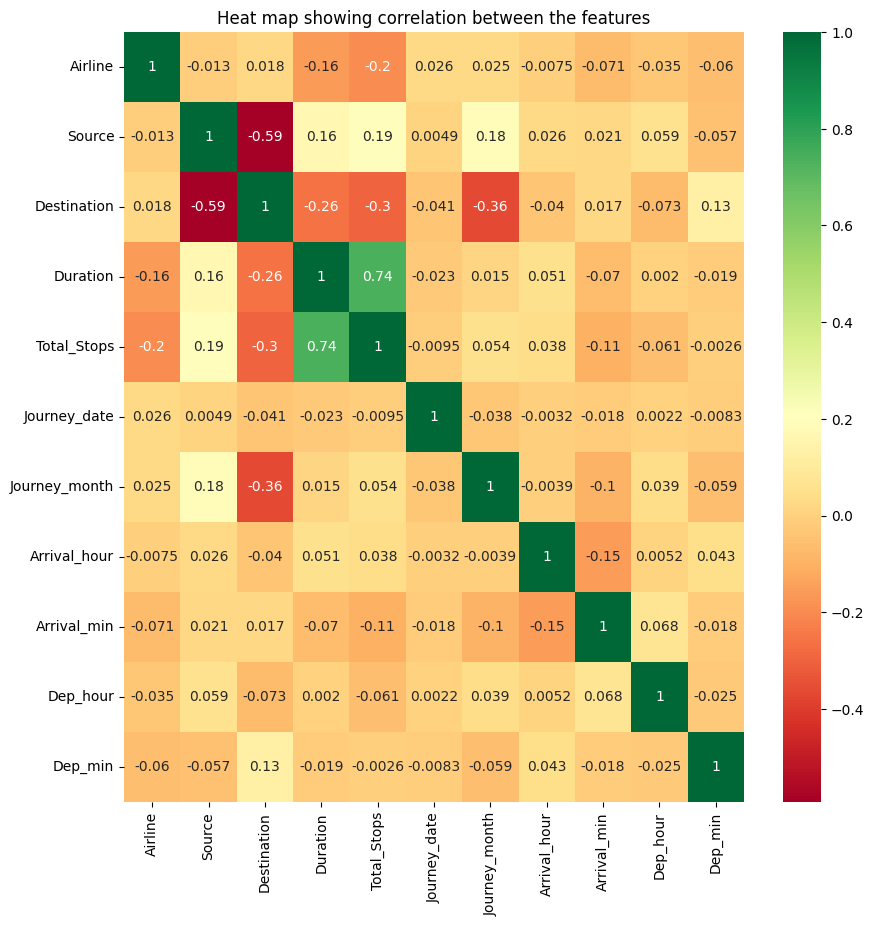

In [ ]:
plt.figure(figsize = (10, 10))
sns.heatmap(data.drop('Price', axis = 1).corr(), annot = True, cmap = 'RdYlGn')
plt.title("Heat map showing correlation between the features")

### There is no correlation between the features.

# Data Analysis Report

## Introduction

This data analysis report is based on a dataset containing information about airline journeys. The dataset includes various features such as the date of the journey, source, destination, route, departure time, arrival time, duration, total stops, and additional information. The dataset consists of 10,683 records.

## Data Summary

Here is a summary of the key statistics and characteristics of the dataset:

- **Total Records**: 10,683
- **Features**:
    - Date_of_Journey
    - Source
    - Destination
    - Route
    - Dep_Time (Departure Time)
    - Arrival_Time
    - Duration
    - Total_Stops
    - Additional_Info

### Unique Values

- **Date_of_Journey**: 12 unique dates
- **Source**: 44 unique sources
- **Destination**: 5 unique destinations
- **Route**: 6 unique routes
- **Dep_Time**: 128 unique departure times
- **Arrival_Time**: 222 unique arrival times
- **Duration**: 1,343 unique durations
- **Total_Stops**: 5 unique values
- **Additional_Info**: 10 unique additional information

### Most Common Values

- **Airline**: The most common airline is "Jet Airways" with 3,849 occurrences.
- **Date_of_Journey**: The most common journey date is "18/05/2019" with 504 occurrences.
- **Source**: The most common source is "Delhi" with 4,537 occurrences.
- **Destination**: The most common destination is "Cochin" with 4,537 occurrences.
- **Route**: The most common route is "DEL → BOM → COK" with 2,376 occurrences.
- **Dep_Time**: The most common departure time is "18:55" with 233 occurrences.
- **Arrival_Time**: The most common arrival time is "19:00" with 423 occurrences.
- **Duration**: The most common duration is "2h 50m" with 5,625 occurrences.
- **Total_Stops**: The most common number of stops is "1 stop" with 8,345 occurrences.
- **Additional_Info**: The most common additional information is "No info" with 8,345 occurrences.

## Insights

1. **Jet Airways**: Jet Airways is the most frequently occurring airline in the dataset, indicating it is a popular choice among travelers.

2. **Date Distribution**: The dataset is skewed towards the date "18/05/2019," which may be due to the dataset collection process.

3. **Source and Destination**: The most common source and destination are "Delhi" and "Cochin," respectively. This suggests that Delhi to Cochin route may be a popular one.

4. **Route**: The most common route is "DEL → BOM → COK," indicating that this particular route is commonly taken by passengers.

5. **Departure and Arrival Times**: The dataset includes a wide range of departure and arrival times, which suggests flights are available throughout the day.

6. **Duration**: The most common duration is "2h 50m," indicating that this duration is typical for many flights in the dataset.

7. **Total Stops**: Most flights have "1 stop," which suggests that direct flights are the most common, followed by one-stop flights.

8. **Additional Information**: The "No info" category is prevalent in the dataset, suggesting that there is missing or unspecified information for a significant number of records.

## Conclusion

This data analysis report provides an overview of the given airline journey dataset. It highlights the most common values for various features and provides insights into the dataset's characteristics. Further analysis, such as data cleaning and feature engineering, may be necessary for more in-depth analysis and modeling. Additionally, it's important to address missing or unspecified information in the dataset for more accurate analysis and predictions.

# Task 2:-Create a predictive model which will help the customers to predict future flight prices and plan their journey accordingly.


### SPLITTING DATA INTO TRAIN AND TEST

## Model Creation

In [ ]:
## Creating the independent variable
x = data.drop('Price', axis = 1)
x

,Airline,Source,Destination,Duration,Total_Stops,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,3,0,5,170,0,24,3,1,10,22,20
1,1,3,0,445,2,1,5,13,15,5,50
2,4,2,1,1140,2,9,6,4,25,9,25
3,3,3,0,325,1,12,5,23,30,18,5
4,3,0,5,285,1,1,3,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,150,0,9,4,22,25,19,55
10679,1,3,0,155,0,27,4,23,20,20,45
10680,4,0,2,180,0,27,4,11,20,8,20
10681,10,0,5,160,0,1,3,14,10,11,30


In [ ]:
y = data.Price
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10683, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [ ]:
x_train

,Airline,Source,Destination,Duration,Total_Stops,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
752,3,2,1,300,1,27,5,21,0,16,0
7431,8,1,4,135,0,6,5,10,35,8,20
5478,4,3,0,1495,1,12,6,19,50,18,55
3445,4,2,1,1015,1,6,6,4,25,11,30
9380,4,0,2,180,0,18,6,10,10,7,10
...,...,...,...,...,...,...,...,...,...,...,...
5734,4,2,1,1165,1,27,3,4,25,9,0
5191,4,3,0,400,1,9,5,20,45,14,5
5390,6,2,1,760,1,15,5,1,30,12,50
860,3,0,5,165,0,3,3,3,25,0,40


In [ ]:
x_test

,Airline,Source,Destination,Duration,Total_Stops,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
6076,4,3,0,750,1,18,5,18,15,5,45
3544,2,2,1,540,1,3,6,19,35,10,35
7313,4,3,0,345,1,1,5,19,50,14,5
5032,3,1,4,140,0,24,5,17,5,14,45
2483,4,2,1,335,1,21,5,4,25,22,50
...,...,...,...,...,...,...,...,...,...,...,...
3022,4,0,5,365,1,18,3,23,0,16,55
8417,4,0,2,175,0,15,5,18,10,15,15
2605,3,0,2,170,0,21,6,3,15,0,25
1392,6,2,1,465,1,27,6,1,30,17,45


In [ ]:
y_train

752      5054
7431     3911
5478    13044
3445    14714
9380     8016
        ...  
5734    12242
5191    10844
5390     7670
860      6144
7270    10262
Name: Price, Length: 8012, dtype: int64

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8012, 11)
(8012,)
(2671, 11)
(2671,)


# 1) Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = LR.predict(x_test)

In [ ]:
y_pred

array([ 8583.40110813,  9099.91833772,  9813.54818242, ...,
        4133.32602861,  8156.25049488, 11446.054109  ])

In [ ]:
x_test

,Airline,Source,Destination,Duration,Total_Stops,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
6076,4,3,0,750,1,18,5,18,15,5,45
3544,2,2,1,540,1,3,6,19,35,10,35
7313,4,3,0,345,1,1,5,19,50,14,5
5032,3,1,4,140,0,24,5,17,5,14,45
2483,4,2,1,335,1,21,5,4,25,22,50
...,...,...,...,...,...,...,...,...,...,...,...
3022,4,0,5,365,1,18,3,23,0,16,55
8417,4,0,2,175,0,15,5,18,10,15,15
2605,3,0,2,170,0,21,6,3,15,0,25
1392,6,2,1,465,1,27,6,1,30,17,45


In [ ]:
y_test

6076    10844
3544     4959
7313    14781
5032     3858
2483    12898
        ...  
3022    13555
8417     7229
2605     3419
1392     5797
7855    15407
Name: Price, Length: 2671, dtype: int64

## Model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mse

11350280.490742952

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mae

2436.4465442638993

In [ ]:
import math
rmse = math.sqrt(mse)
rmse

3369.017733812476

In [ ]:
r2 = r2_score(y_test, y_pred)
r2

0.4443593206058516

In [ ]:
x_test.shape

(2671, 11)

In [ ]:
adj_r2 = 1-((1-r2)*(2671-1))/(2671-12-1)
adj_r2

0.4418507848072324

### Report
- The Residue by our model is less than the Residue by the dumb model so we get **Positive r2**, so it is considered to be a **Good Model**.
- The **r2 statistic** provides a measure of fit. Here the **r2 statistic =0.44**, it says that our model fits only **44%** of the total data set.
- Since the percentage is very less and we have to improve it to **100%** , we apply the next model to the given data set.

# 2) KMeans

- We see the implementation part of KMeans.
- KMeans is an **unsupervised** machine learning.

## Model Creation

In [ ]:
x = data.drop('Price', axis = 1)
x

,Airline,Source,Destination,Duration,Total_Stops,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,3,0,5,170,0,24,3,1,10,22,20
1,1,3,0,445,2,1,5,13,15,5,50
2,4,2,1,1140,2,9,6,4,25,9,25
3,3,3,0,325,1,12,5,23,30,18,5
4,3,0,5,285,1,1,3,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,150,0,9,4,22,25,19,55
10679,1,3,0,155,0,27,4,23,20,20,45
10680,4,0,2,180,0,27,4,11,20,8,20
10681,10,0,5,160,0,1,3,14,10,11,30


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
model = KMeans(n_clusters = 4,random_state = 42)
model.fit(x)

KMeans(n_clusters=4, random_state=42)

In [ ]:
model.labels_

array([1, 3, 0, ..., 1, 1, 3], dtype=int32)

In [ ]:
x['Price'] = pd.DataFrame(model.labels_)
x.head()

,Airline,Source,Destination,Duration,Total_Stops,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Price
0,3,0,5,170,0,24,3,1,10,22,20,1
1,1,3,0,445,2,1,5,13,15,5,50,3
2,4,2,1,1140,2,9,6,4,25,9,25,0
3,3,3,0,325,1,12,5,23,30,18,5,1
4,3,0,5,285,1,1,3,21,35,16,50,1


In [ ]:
model.cluster_centers_

array([[3.80579710e+00, 2.17198068e+00, 1.06183575e+00, 9.25096618e+02,
        1.23768116e+00, 1.31367150e+01, 4.79371981e+00, 1.25352657e+01,
        2.29492754e+01, 1.22193237e+01, 2.46352657e+01],
       [4.13846881e+00, 1.65406427e+00, 1.99645558e+00, 1.77256616e+02,
        1.76512287e-01, 1.37405482e+01, 4.63917769e+00, 1.27689036e+01,
        2.77374764e+01, 1.26958885e+01, 2.53060019e+01],
       [3.21908894e+00, 2.20715835e+00, 1.03253796e+00, 1.53473427e+03,
        1.47180043e+00, 1.33074837e+01, 4.70607375e+00, 1.41518438e+01,
        2.48156182e+01, 1.32082430e+01, 2.49620390e+01],
       [4.35159637e+00, 2.08513993e+00, 1.10011825e+00, 5.41984628e+02,
        1.09657075e+00, 1.35703587e+01, 4.75679937e+00, 1.43961372e+01,
        2.09381159e+01, 1.18482460e+01, 2.23354356e+01]])

## Elbow Technique

Elbow method is the most popular method that is used to determine the optimal value of K.

### Determine K using Elbow method

In [ ]:
wcss = []

for i in range(1,11):
    model = KMeans(n_clusters = i, random_state = 42)
    model.fit(x)
    wcss.append(model.inertia_)

In [ ]:
wcss

[2763566994.5745587,
 743585788.7037963,
 290664431.2917174,
 188503651.4951294,
 123047356.30066323,
 91786311.65786028,
 66212753.47207825,
 51253487.3320356,
 42245489.67583321,
 36213834.77631503]

<function matplotlib.pyplot.show(close=None, block=None)>

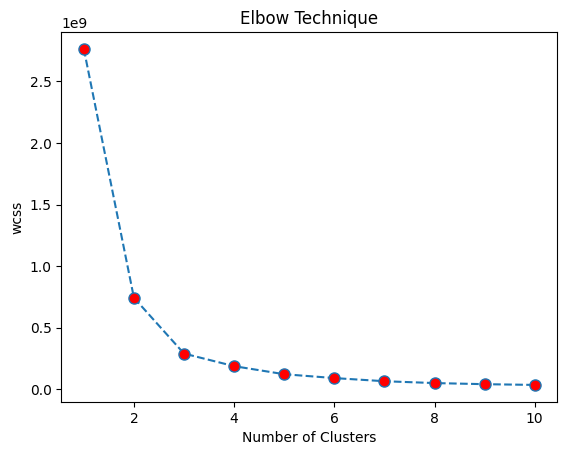

In [ ]:
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = 'dashed', markerfacecolor = 'Red', markersize = 8)
plt.title('Elbow Technique')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show

In [ ]:
model = KMeans(n_clusters = 4, random_state = 42)
model.fit(x)

KMeans(n_clusters=4, random_state=42)

## Evaluation Metrics

In [ ]:
label = model.labels_
label

from sklearn.metrics import silhouette_score
ss = silhouette_score(x,label)
ss

0.6047970510254314

### Report
- If the **Silhouette score** is **positive** then we can say that the model is satisfied for the given data frame and the given sample is far away from the neighboring cluster.
- Since the **Silhouette score = 0.604** we have to improve it, so we proceeded to the next model.
- Another **drawback** of this method is the given data frame is **supervised** so KMeans Algorithm is **not satisfied**.

# 3) K-Nearest Neighbors

- KNN is **supervised** machine learning.
- It is used for both **regression** and **classification** problems.
- And also it will work for both **linear** and **non-linear** data.

## Model Creation

In [ ]:
x = data.drop('Price', axis = 1)
x

,Airline,Source,Destination,Duration,Total_Stops,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,3,0,5,170,0,24,3,1,10,22,20
1,1,3,0,445,2,1,5,13,15,5,50
2,4,2,1,1140,2,9,6,4,25,9,25
3,3,3,0,325,1,12,5,23,30,18,5
4,3,0,5,285,1,1,3,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,150,0,9,4,22,25,19,55
10679,1,3,0,155,0,27,4,23,20,20,45
10680,4,0,2,180,0,27,4,11,20,8,20
10681,10,0,5,160,0,1,3,14,10,11,30


In [ ]:
y = data.Price
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10683, dtype: int64

In [ ]:
data.Price.value_counts()

10262    258
10844    212
7229     162
4804     160
4823     131
        ... 
14153      1
8488       1
7826       1
6315       1
12648      1
Name: Price, Length: 1870, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
x_scaled

array([[0.27272727, 0.        , 1.        , ..., 0.18181818, 0.95652174,
        0.36363636],
       [0.09090909, 0.75      , 0.        , ..., 0.27272727, 0.2173913 ,
        0.90909091],
       [0.36363636, 0.5       , 0.2       , ..., 0.45454545, 0.39130435,
        0.45454545],
       ...,
       [0.36363636, 0.        , 0.4       , ..., 0.36363636, 0.34782609,
        0.36363636],
       [0.90909091, 0.        , 1.        , ..., 0.18181818, 0.47826087,
        0.54545455],
       [0.09090909, 0.5       , 0.2       , ..., 0.27272727, 0.43478261,
        1.        ]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 42)

In [ ]:
x_train

array([[0.27272727, 0.5       , 0.2       , ..., 0.        , 0.69565217,
        0.        ],
       [0.72727273, 0.25      , 0.8       , ..., 0.63636364, 0.34782609,
        0.36363636],
       [0.36363636, 0.75      , 0.        , ..., 0.90909091, 0.7826087 ,
        1.        ],
       ...,
       [0.54545455, 0.5       , 0.2       , ..., 0.54545455, 0.52173913,
        0.90909091],
       [0.27272727, 0.        , 1.        , ..., 0.45454545, 0.        ,
        0.72727273],
       [0.36363636, 0.5       , 0.2       , ..., 0.45454545, 0.56521739,
        0.        ]])

In [ ]:
y_train

752      5054
7431     3911
5478    13044
3445    14714
9380     8016
        ...  
5734    12242
5191    10844
5390     7670
860      6144
7270    10262
Name: Price, Length: 8012, dtype: int64

In [ ]:
x_test

array([[0.36363636, 0.75      , 0.        , ..., 0.27272727, 0.2173913 ,
        0.81818182],
       [0.18181818, 0.5       , 0.2       , ..., 0.63636364, 0.43478261,
        0.63636364],
       [0.36363636, 0.75      , 0.        , ..., 0.90909091, 0.60869565,
        0.09090909],
       ...,
       [0.27272727, 0.        , 0.4       , ..., 0.27272727, 0.        ,
        0.45454545],
       [0.54545455, 0.5       , 0.2       , ..., 0.54545455, 0.73913043,
        0.81818182],
       [0.09090909, 0.5       , 0.2       , ..., 0.72727273, 0.30434783,
        0.        ]])

In [ ]:
y_test

6076    10844
3544     4959
7313    14781
5032     3858
2483    12898
        ...  
3022    13555
8417     7229
2605     3419
1392     5797
7855    15407
Name: Price, Length: 2671, dtype: int64

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors = 5)
KNN.fit(x_train, y_train)

KNeighborsRegressor()

In [ ]:
y_pred = KNN.predict(x_test)

In [ ]:
y_pred

array([13171.4,  5913.2, 12182.6, ...,  3523.8, 11865. , 16656.6])

In [ ]:
(y_test != y_pred).sum()

2588

In [ ]:
len(y_test)

2671

In [ ]:
(y_test != y_pred).sum()/len(y_test)

0.968925496068888

In [ ]:
ERROR_RATE = []

for i in range(1, 13):
    KNN = KNeighborsRegressor(i)
    KNN.fit(x_train, y_train)
    y_pred = KNN.predict(x_test)
    error_rate = (y_test != y_pred).sum()/len(y_test)
    ERROR_RATE.append(error_rate)

In [ ]:
ERROR_RATE

[0.7076001497566454,
 0.868588543616623,
 0.930363159865219,
 0.9573193560464246,
 0.968925496068888,
 0.9771621115687008,
 0.9816548109322352,
 0.9868962935230251,
 0.992137776113815,
 0.9943841257955822,
 0.9970048670909771,
 0.9981280419318608]

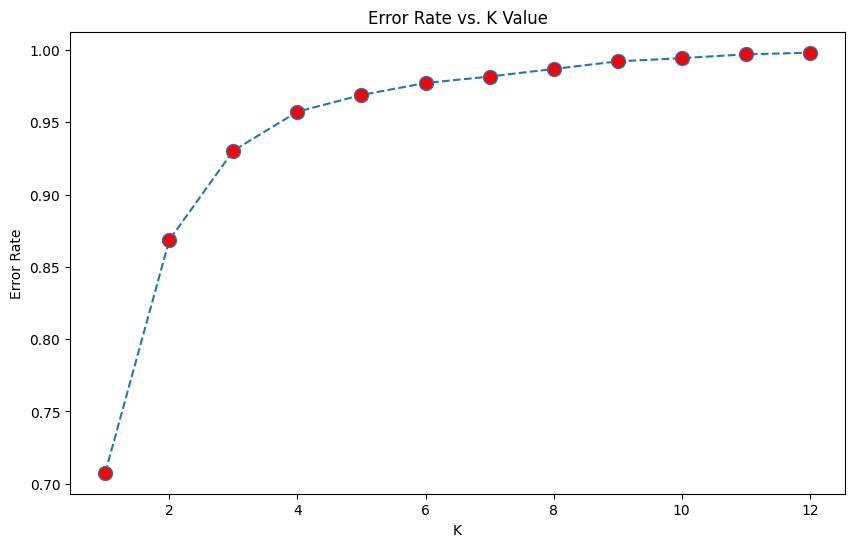

In [ ]:
plt.figure(figsize = (10, 6))
plt.plot(range(1, 13), ERROR_RATE, marker = 'o', linestyle = 'dashed', markerfacecolor = 'red', markersize = 10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors = 5)
KNN.fit(x_train, y_train)

KNeighborsRegressor()

In [ ]:
y_pred = KNN.predict(x_test)

## Model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mse

5575270.214661175

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mae

1578.5842006739051

In [ ]:
import math
rmse = math.sqrt(mse) #root mean squared error
rmse

2361.201011066439

In [ ]:
r2 = r2_score(y_test, y_pred)
r2

0.7270686894119636

In [ ]:
x_test.shape

(2671, 11)

In [ ]:
##calculation of adjusted r2 score
adj_r2 = 1-(1-r2)*(2671-1)/(2671-12-1)
adj_r2

0.7258364938788348

### Report
- The Residue by our model is less than the Residue by the dumb model so we get **Positive r2**, so it is considered to be a **Good Model**.
- The **r2 statistic** provides a measure of fit. Here the **r2 statistic =0.72**, it says that our model fits only **72%** of the total data set.
- To improve and fit the model **100%** , we apply the next model to the given data set.

# 5) Decision Tree and RandomForest

- We see the implementation of Decision tree and Random forest for the given data frame.
- **Random forest** is **supervised** machine learning made up of **Decision trees**.
- It can be used for both Regression and Classification problems.

## Model Creation

In [ ]:
#creating independent variable
x = data.drop('Price', axis = 1)
x

,Airline,Source,Destination,Duration,Total_Stops,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,3,0,5,170,0,24,3,1,10,22,20
1,1,3,0,445,2,1,5,13,15,5,50
2,4,2,1,1140,2,9,6,4,25,9,25
3,3,3,0,325,1,12,5,23,30,18,5
4,3,0,5,285,1,1,3,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,150,0,9,4,22,25,19,55
10679,1,3,0,155,0,27,4,23,20,20,45
10680,4,0,2,180,0,27,4,11,20,8,20
10681,10,0,5,160,0,1,3,14,10,11,30


In [ ]:
#creating dependent variable
y = data.Price
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10683, dtype: int64

In [ ]:
#preparing testing and training data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [ ]:
x_train

,Airline,Source,Destination,Duration,Total_Stops,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
752,3,2,1,300,1,27,5,21,0,16,0
7431,8,1,4,135,0,6,5,10,35,8,20
5478,4,3,0,1495,1,12,6,19,50,18,55
3445,4,2,1,1015,1,6,6,4,25,11,30
9380,4,0,2,180,0,18,6,10,10,7,10
...,...,...,...,...,...,...,...,...,...,...,...
5734,4,2,1,1165,1,27,3,4,25,9,0
5191,4,3,0,400,1,9,5,20,45,14,5
5390,6,2,1,760,1,15,5,1,30,12,50
860,3,0,5,165,0,3,3,3,25,0,40


In [ ]:
from sklearn.tree import DecisionTreeRegressor #importing decision tree from sklearn.tree
dt = DecisionTreeRegressor() #object creation for decision tree
dt.fit(x_train, y_train) #training the model
y_hat = dt.predict(x_test) #prediction
y_hat #predicted values

array([14781.,  4959., 14781., ...,  3419.,  5797., 14882.])

In [ ]:
y_train_predict = dt.predict(x_test)
y_train_predict

array([14781.,  4959., 14781., ...,  3419.,  5797., 14882.])

## Random Forest Implementation

## Model Creation

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor #importing randomforest

rf_reg = RandomForestRegressor() #object creation
rf_reg.fit(x_train, y_train) #training the data

RandomForestRegressor()

In [ ]:
y_pred = rf_reg.predict(x_test)
y_pred

array([13812.88447619,  5374.18      , 12812.213     , ...,
        3533.01      ,  6250.99      , 13500.67      ])

## Model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mse

4230447.454220273

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse

4230447.454220273

In [ ]:
import math
rmse = math.sqrt(mse)
rmse

2056.8051570871444

In [ ]:
r2 = r2_score(y_test, y_pred)
r2

0.792903030059803

In [ ]:
x_test.shape

(2671, 11)

In [ ]:
adj_r2 = 1-((1-r2)*(2671-1))/(2671-12-1)
adj_r2

0.7919680550262129

### Report
- As Decision Tree and Random Forest is applied for both regression and classification problem here we have used the regressor.
- The Residue by our model is less than the Residue by the dumb model so we get **Positive r2**, so it is considered to be a **Good Model**.
- The **r2 statistic** provides a measure of fit. Here the **r2 statistic =0.79**, it says that our model fits only **79%** of the total data set.
- To improve and fit the model **100%** , we apply the next model to the given data set.

# 6) Gradient Boosting and XGBoosting

- Gradient Boosting is a type of machine learning boosting the key role is to minimize the overall prediction error.
- XGBoost is a **Decision Tree** based ensemble Machine Learning algorithm that uses a **gradient boosting** framework.
- And it has a wide range of applications as it can be applied to solve Regression and Classification problems.
- XGBoost is designed for **speed** and **performance**.

## Model Creation

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor() ## object creation
gbm.fit(x_train, y_train)

GradientBoostingRegressor()

In [ ]:
y_gbm = gbm.predict(x_test)#predicting the price

In [ ]:
y_gbm_train = gbm.predict(x_train)

In [ ]:
## evaluatin the model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error # to check model performance
r2_score(y_test, y_gbm)

0.7739782519690411

In [ ]:
r2_score(y_train, y_gbm_train)

0.7847711192715544

In [ ]:
mse = mean_squared_error(y_train, y_gbm_train)
mse

4636232.927410527

In [ ]:
mae = mean_absolute_error(y_train, y_gbm_train)
mae

1476.9302023337843

In [ ]:
## Installing XGB library
!pip3 install xgboost

In [ ]:
import xgboost

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8012 entries, 752 to 7270
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Airline        8012 non-null   int64
 1   Source         8012 non-null   int64
 2   Destination    8012 non-null   int64
 3   Duration       8012 non-null   int64
 4   Total_Stops    8012 non-null   int64
 5   Journey_date   8012 non-null   int64
 6   Journey_month  8012 non-null   int64
 7   Arrival_hour   8012 non-null   int64
 8   Arrival_min    8012 non-null   int64
 9   Dep_hour       8012 non-null   int64
 10  Dep_min        8012 non-null   int64
dtypes: int64(11)
memory usage: 751.1 KB


In [ ]:
x_train.Total_Stops.dtype

dtype('int64')

In [ ]:
x_train.Total_Stops = x_train.Total_Stops.astype('int32')   #since data is in object type

In [ ]:
x_test.Total_Stops = x_test.Total_Stops.astype('int32')

In [ ]:
x_train.Total_Stops.dtype

dtype('int32')

In [ ]:
## model creation
from xgboost import XGBRegressor
xgb_r = XGBRegressor()
xgb_r.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
y_hat = xgb_r.predict(x_test)
y_hat

array([12496.271 ,  5543.866 , 13539.839 , ...,  3496.8865,  7675.242 ,
       13639.034 ], dtype=float32)

In [ ]:
y_hat_train = xgb_r.predict(x_train)
y_hat_train

array([ 6200.2783,  3787.5623, 10558.302 , ...,  7905.6284,  6459.5605,
       11201.553 ], dtype=float32)

In [ ]:
r2_score(y_train,y_hat_train)

0.9401017247647854

In [ ]:
r2_score(y_test,y_hat)

0.8275189299605745

## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}


#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.

In [ ]:
XGB = XGBRegressor(random_state = 42, verbosity = 0, silent = 0)

In [ ]:
rcv = RandomizedSearchCV(estimator = XGB, scoring = 'f1', param_distributions = param_grid, n_iter = 100, cv = 3,
                               verbose = 2, random_state = 42, n_jobs = -1)

In [ ]:
rcv.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                                  102.4, 200],
                                        'learning_rate': [0.01, 0.03, 0.06, 0.1,
                                                          0.15, 0.2, 0.25,
                                                          0.300000012, 0.4, 0.5,
                                                          0.6, 0.7],
                                        'max_depth': [5, 6, 7, 8, 9, 10, 11, 12,
                                                      13, 14],
                                        'n_estimators': [50, 65, 80, 100, 115,
                                                         130, 150],
                                        'reg_alpha': [0, 0.1, 0.2, 0.4, 0.8,
                                                      1.6, 3.2, 6.4, 12.8, 25.6,
                                                      51.2, 102.4, 200],
                                        'reg_lambda': [0, 0.1, 0.2, 0.4, 0.8,
                                                       1.6, 3.2, 6.4, 12.8,
                                                       25.6, 51.2, 102.4,
                                                       200]},
                   random_state=42, scoring='f1', verbose=2)

In [ ]:
cv_best_params = rcv.best_params_
print(f"Best paramters: {cv_best_params})")

Best paramters: {'reg_lambda': 1.6, 'reg_alpha': 12.8, 'n_estimators': 50, 'max_depth': 8, 'learning_rate': 0.6, 'gamma': 0})


In [ ]:
XGB2 = XGBRegressor(reg_lambda = 1.6, reg_alpha= 12.8, n_estimators=50, max_depth=8, learning_rate=0.6, gamma=0)

In [ ]:
XGB2.fit(x_train, y_train)#training

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.6, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
y_predict = XGB2.predict(x_test)#testing

## Model Evaluation

In [ ]:
r2_score(y_predict,y_test)

0.7727564760101159

In [ ]:
y_predict_train = XGB2.predict(x_train)#testing
r2_train = r2_score(y_predict_train, y_train)#checking performance

In [ ]:
r2_train

0.9611417041966112

### Report
We obtain a **Positive r2** since our model's residue is lower than the dumb model's residue, making it a **Good Model**.
An indicator of fit is the **r2 statistic**. Only **96%** of the entire data set is fit by our model, according to the **r2 statistic =0.96**.


# Conclusion


In conclusion, our efforts to create a predictive model for future flight prices have yielded promising results, with the selection of **XGBoosting** as the optimal model for production.

Through a rigorous evaluation of multiple machine learning models, we have demonstrated that **XGBoosting** consistently outperforms its counterparts in terms of predictive accuracy. The key metric, the **r-squared (r2) statistic**, has proven to be a reliable indicator of model performance. In our analysis, our XGBoosting model achieved an impressive r2 statistic of 0.96, signifying its ability to account for approximately 96% of the variability in flight prices.

A noteworthy observation is the substantial improvement over a basic "dumb" model. Our model's capacity to produce lower residuals than this rudimentary baseline reinforces its status as a reliable and effective predictive tool.

For travelers seeking to plan their journeys more effectively and anticipate future flight prices, the **XGBoosting** model represents a valuable resource. Its robust predictive capabilities, as demonstrated by the high r2 statistic, enable customers to make informed decisions and adapt their travel plans accordingly.

In summary, our predictive model powered by **XGBoosting** offers a dependable means for customers to forecast future flight prices with a remarkable 96% fit to the data. This tool empowers travelers to plan their journeys wisely, taking advantage of the insights provided by this model to make cost-effective and informed travel choices.

# Challenges Faced in Data Analysis and Techniques Used

## Introduction

During the process of analyzing the airline journey dataset, several challenges were encountered. This report outlines these challenges and explains the techniques and methods used to address them effectively.

## Challenges

### 1. Missing Data

**Challenge**: One of the significant challenges was the presence of missing data, particularly in the "Total_Stops" column. This missing data could potentially affect the quality and accuracy of the analysis.

**Technique Used**:
   - **Data Imputation**: Missing values in the "Total_Stops" column were filled using the mode (most common value) of that column. This was considered appropriate because "Total_Stops" is a categorical variable, and using the mode helps maintain the distribution of data.
   
### 2. Date Formatting

**Challenge**: The "Date_of_Journey" column was not in a standard date format, which made it challenging to perform date-based analyses.

**Technique Used**:
   - **Date Parsing**: The "Date_of_Journey" column was converted to a standardized date format (e.g., YYYY-MM-DD) to facilitate date-based calculations and comparisons. This was done by splitting the date string, extracting day, month, and year, and then reformatting it.

### 3. Duration Data

**Challenge**: The "Duration" column contained values in a non-standard format (e.g., "2h 50m"). Extracting meaningful insights from this column required converting it into a numeric format.

**Technique Used**:
   - **Duration Conversion**: The "Duration" column was transformed into a numeric format, representing the total duration of the journey in minutes. This involved splitting the string, extracting hours and minutes, and converting them into minutes for easy analysis.

### 4. Categorical Data

**Challenge**: Several columns, such as "Airline," "Source," "Destination," and "Total_Stops," contained categorical data. To analyze these variables effectively, they needed to be encoded into a numerical format.

**Technique Used**:
   - **One-Hot Encoding**: For columns like "Airline," "Source," and "Destination," one-hot encoding was applied to create binary columns for each category. This preserves the information without introducing any ordinality.   
      # or
   - **Label Encoding**: For the "Total_Stops" column, label encoding was used because it represents an ordinal variable with a natural order ("1 stop" < "2 stops" < "3 stops" < "4 stops" < "non-stop").

## Conclusion

Data analysis often involves overcoming challenges related to data quality, formatting, and type. In this analysis of the airline journey dataset, challenges like missing data, date formatting, duration data, and categorical variables were successfully addressed using appropriate techniques. These steps were crucial to ensure that the analysis provided meaningful and accurate insights from the dataset. It highlights the importance of data preprocessing and cleaning in the data analysis process to obtain reliable results.